In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. Parameter dasar
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32
TRAIN_PATH = "dataset\Training\Training" 
TEST_PATH = "dataset\Testing\Testing" 

In [4]:
# 2. Preprocessing & Augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale'
)


Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [5]:
# 3. Bangun CNN Model
model = Sequential()
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [10]:
# 4. Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# 5. Callback
checkpoint = ModelCheckpoint('cnn_model_best.weights.h5', save_best_only=True, save_weights_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
# 6. Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 72s 97ms/step - accuracy: 0.5938 - loss: 1.0524 - val_accuracy: 0.5976 - val_loss: 1.0625
Epoch 2/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 70s 100ms/step - accuracy: 0.5969 - loss: 1.0543 - val_accuracy: 0.6008 - val_loss: 1.0599
Epoch 3/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 73s 103ms/step - accuracy: 0.5971 - loss: 1.0461 - val_accuracy: 0.5923 - val_loss: 1.0613
Epoch 4/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 71s 100ms/step - accuracy: 0.6001 - loss: 1.0275 - val_accuracy: 0.6035 - val_loss: 1.0539
Epoch 5/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 76s 108ms/step - accuracy: 0.5967 - loss: 1.0420 - val_accuracy: 0.5992 - val_loss: 1.0546
Epoch 6/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 100s 142ms/step - accuracy: 0.5996 - loss: 1.0428 - val_accuracy: 0.6049 - val_loss: 1.0518
Epoch 7/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 101s 143ms/step - accuracy: 0.6055 - loss: 1.0338 - val_accuracy: 0.6045 - val_loss: 1.0509
Epoch 8/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 101s 143ms/step - accuracy: 0.6044 - loss:

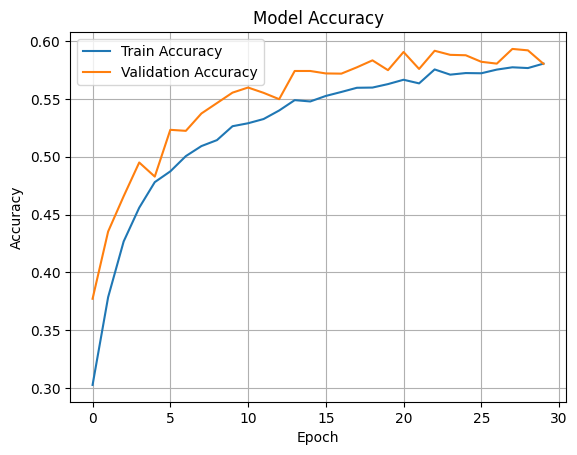

In [9]:
# 7. Visualisasi Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()